**CREDIT CARD FRAUD DETECTION MODEL USING LOGISTIC REGRESSION, KNN, SVM, KERNEL SVM, DECISION TREE AND RANDOM FOREST CLASSIFICATION**


https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code 

IMPORTING LIBRARIES 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

LOADING DATASET

In [ ]:
dataset = pd.read_csv("creditcard.csv")
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#checking for missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

OVERCOMING DATA IMBALANCE PROBLEM USING SMOTE

In [ ]:
#checking for data imbalance 
dataset["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

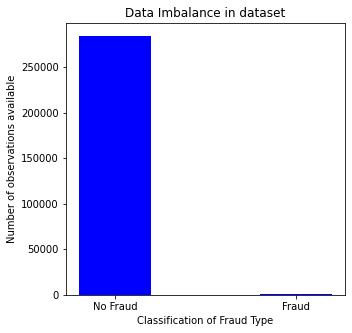

In [ ]:
data = {'No Fraud': 284315, 'Fraud': 492}
fraud_type = list(data.keys())
num_fraud = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(fraud_type, num_fraud, color ='blue',
        width = 0.4)
 
plt.xlabel("Classification of Fraud Type")
plt.ylabel("Number of observations available")
plt.title("Data Imbalance in dataset")
plt.show()

In [ ]:
#splitting independent and dependent variables
X = dataset.drop(columns="Class", axis = 1)
y = dataset["Class"]

In [ ]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [ ]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [ ]:
import collections
counter = collections.Counter(y)
print(counter)

Counter({0: 284315, 1: 492})


In [ ]:
#oversampling Y to balance the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
#checking for successful oversampling
import collections
counter = collections.Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


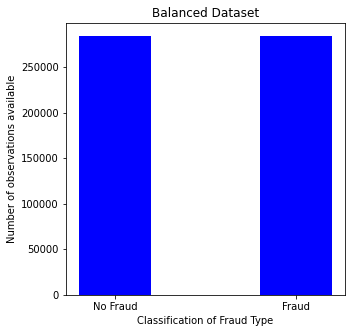

In [ ]:
bal_data = {'No Fraud': 284315, 'Fraud': 284315}
fraud_type = list(bal_data.keys())
num_fraud = list(bal_data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(fraud_type, num_fraud, color ='blue',
        width = 0.4)
 
plt.xlabel("Classification of Fraud Type")
plt.ylabel("Number of observations available")
plt.title("Balanced Dataset")
plt.show()

SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train[["Time", "Amount"]] = sc.fit_transform(X_train[["Time", "Amount"]])
X_test[["Time", "Amount"]] = sc.transform(X_test[["Time", "Amount"]])

In [ ]:
print(X_train)

            Time         V1         V2         V3        V4         V5  \
162940  0.576597   2.038913   0.528394  -2.386035  0.778121   0.495012   
166767  0.634563  -0.016400   1.128796  -0.700766 -1.035438   1.107485   
404294 -0.614882  -0.900177   2.285153  -2.747532  3.541599   0.163408   
492355 -1.257775 -25.214943  14.302062 -26.782233  6.347031 -18.630812   
335478 -0.966579 -10.593925   5.923701 -11.671340  8.757869  -7.979743   
...          ...        ...        ...        ...       ...        ...   
162597  0.570946  -0.906367   0.119679   1.081533 -2.512543   0.376275   
103213 -0.399059   1.146503  -0.200359   1.449262  0.904295  -1.404907   
35149  -1.033984   1.015056  -0.500630   0.070896 -0.841525  -0.815229   
547872 -0.489112  -4.365391   2.456434  -4.290802  3.132465  -3.911339   
324364  1.690928  -1.918576   1.126114  -4.519698  1.748343  -1.560832   

              V6         V7         V8        V9  ...       V20       V21  \
162940 -1.745072   0.312794  -0.34

In [ ]:
print(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
566212  1.134171 -2.421548  0.858512 -4.584762  4.289283  0.132819 -0.307795   
298392  1.505241 -2.705222  1.581581 -2.186677  2.375582 -1.111366 -1.074637   
251389  1.403974 -1.989265 -1.252906  1.367787  1.116307  0.958361 -0.241307   
394752 -0.724648  0.018639 -0.563732  0.825951  2.060238 -0.892289  0.417710   
118514 -0.262746  1.296218  0.043078 -0.235619  0.057475  0.528526  0.769875   
...          ...       ...       ...       ...       ...       ...       ...   
522710  1.114506 -5.513354 -1.807204 -4.299714  2.731130 -0.537452 -0.323660   
108843 -0.346017 -1.213990  0.673301  1.146411  0.005007  1.347501 -1.276989   
556298  0.796336 -0.469367  1.738145 -3.411423  0.867916  0.190290 -1.369450   
464650  1.381767 -0.571767  2.637450 -4.083519  1.414715  1.060387 -1.344236   
129906 -0.176940  1.182883 -0.557886  0.736580 -0.954457 -0.930228  0.124596   

              V7        V8        V9  .

**LOGISTIC REGRESSION**

---


BUILD AND TRAIN THE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()
log_class.fit(X_train, y_train)

LogisticRegression()

MAKE PREDICTIONS

In [ ]:
log_y_pred = log_class.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, log_y_pred)
print(cm1)

ac1 = accuracy_score(y_test, log_y_pred)
print("The accuracy score for logistic regression classifier is: ", ac1)

[[56498   494]
 [ 1721 55013]]
The accuracy score for logistic regression classifier is:  0.9805233631711306


**KNN**

---





BUILD AND TRAIN THE MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn_class = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski")
knn_class.fit(X_train, y_train)

KNeighborsClassifier()

MAKING PREDICTIONS

In [ ]:
knn_y_pred = knn_class.predict(X_test)

EVALUATING THE MODEL 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm2 = confusion_matrix(y_test, knn_y_pred)
print(cm2)
ac2 = accuracy_score(y_test, knn_y_pred)
print("The accuracy score for KNN classifier is: ", ac2)

[[56919    73]
 [    0 56734]]
The accuracy score for KNN classifier is:  0.9993581063257303


**KERNEL SVM**


---



BUILDING AND TRAINING MODEL

In [ ]:
from sklearn.svm import SVC 
kersvm_class = SVC(kernel="rbf")
kersvm_class.fit(X_train, y_train)

SVC()

MAKING PREDICTIONS

In [ ]:
kersvm_y_pred = kersvm_class.predict(X_test)

EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm4 = confusion_matrix(y_test, kersvm_y_pred)
print(cm4)
ac4 = accuracy_score(y_test, kersvm_y_pred)
print("The accuracy score for non-linear SVM classifier is: ", ac4)

[[56652   195]
 [  865 56014]]
The accuracy score for non-linear SVM classifier is:  0.9906793521270422


**NAIVE BAYES**


---



BUILDING AND TRAINING THE MODEL

In [ ]:
from sklearn.naive_bayes import GaussianNB 
nb_class = GaussianNB()
nb_class.fit(X_train, y_train)

GaussianNB()

MAKING PREDICTIONS

In [ ]:
nb_y_pred = nb_class.predict(X_test)

EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm5 = confusion_matrix(y_test, nb_y_pred)
print(cm5)
ac5 = accuracy_score(y_test, nb_y_pred)
print("The accuracy score for naive bayes classifier is: ", ac5)

[[55474  1314]
 [ 7221 49717]]
The accuracy score for naive bayes classifier is:  0.9249511984946275


**DECISION TREE CLASSIFICATION**


---



BUILDING AND TRAINING THE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt_class = DecisionTreeClassifier(criterion="entropy")
dt_class.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

MAKING PREDICTIONS

In [ ]:
dt_y_pred = dt_class.predict(X_test)

EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm6 = confusion_matrix(y_test, dt_y_pred)
print(cm6)
ac6 = accuracy_score(y_test, dt_y_pred)
print("The accuracy score for Decision Tree classifier is: ", ac6)

[[56683   105]
 [   42 56896]]
The accuracy score for Decision Tree classifier is:  0.9987074195874295


**RANDOM FOREST CLASSIFICATION**


---



BUILDING AND TRAINING THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators = 50, criterion="entropy")
rf_class.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

MAKING PREDICTIONS

In [ ]:
rf_y_pred = rf_class.predict(X_test)

EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
cm7 = confusion_matrix(y_test, rf_y_pred)
print(cm7)
ac7 = accuracy_score(y_test, rf_y_pred)
print("The accuracy score for Decision Tree classifier is: ", ac7)

[[56779     9]
 [    0 56938]]
The accuracy score for Decision Tree classifier is:  0.9999208624237201


**CONCLUSIONS**


---



Six classification models were implemented to classify credit transcations in "no fraud" or "fraud" category.

The logistic regression classification had an accuracy score of 98.05%. It was able to classify 56498 "no frauds" correctly and 494 incorrectly. For the "frauds", it was able to classify 55013 predictions correctly and 1721 incorrectly.


The KNN classification had an accuracy score of 99.93%. It was able to classify 56919 "no frauds" correctly and 73 incorrectly. For the "frauds", it was able to classify all 56734 predictions correctly.

The Kernel SVM classification had an accuracy score of 99.06%. It was able to classify 56652 "no frauds" correctly and 195 incorrectly. For the "frauds", it was able to classify 56014 predictions correctly and 865 incorrectly.

The Naive Bayes classification had an accuracy score of 92.49%. It was able to classify 55474 "no frauds" correctly and 1314 incorrectly. For the "frauds", it was able to classify 49717 predictions correctly and 7221 incorrectly.

The Decision Tree classification had an accuracy score of 99.87%. It was able to classify 56683 "no frauds" correctly and 105 incorrectly. For the "frauds", it was able to classify 56896 predictions correctly and 42 incorrectly.

The Random Forest classification had an accuracy score of 99.99%. It was able to classify 56779 "no frauds" correctly and 9 incorrectly. For the "frauds", it was able to classify all 56938 predictions correctly.


---


Therefore, on the basis of the confusion matrix and accuracy score, Random Forest Classifier has performed the best followed by KNN Classifier. The Naiye Bayes Classifier has not performed as well as other classifiers for this particular problem. 


---

